# Sentiment and EDA

by-pg9349

This code does sentiment and EDA for the corpus.

Data for this code is attached and can be run without running the data prep steps in the data prep folder



In [4]:
import multiprocessing
from tqdm import tqdm
cores = multiprocessing.cpu_count()

In [5]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [7]:
import pandas as pd
df=pd.read_json("un_speeches_tokenised.json",orient='records',compression='infer')

In [18]:
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
counts=df[['Year','Country','count_speech_words', 'count_speech_sent']].groupby('Year').mean()

In [35]:
mainplot=df[['Year','Country']].groupby('Year').count()

In [12]:
counts=counts.reset_index()


In [37]:
mainplot=mainplot.reset_index()

In [15]:
counts.head()
counts['Year']=counts['Year'].astype(int)

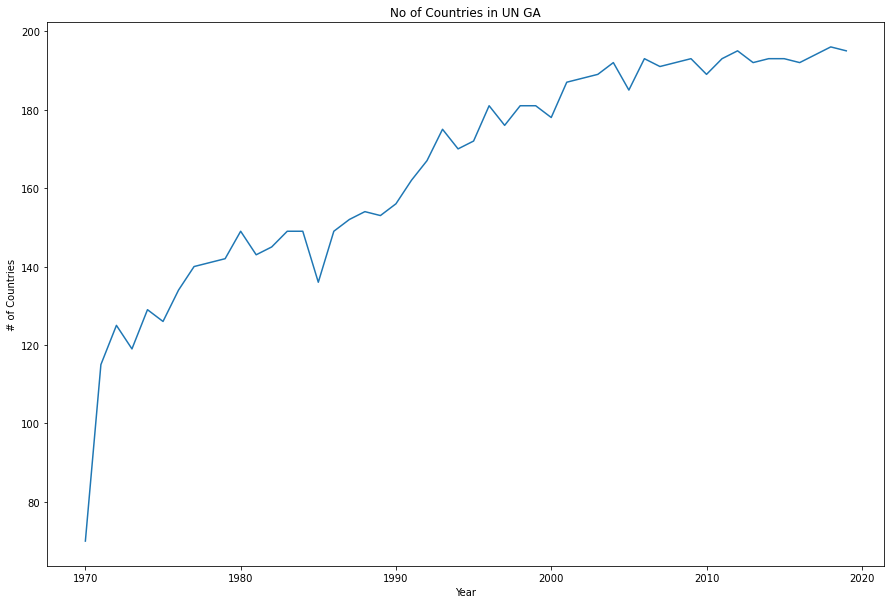

In [38]:
plt.figure(figsize=(15,10))
plt.plot(mainplot['Year'], mainplot['Country'])
plt.xlabel("Year")
plt.ylabel("# of Countries")
plt.title("No of Countries in UN GA")
plt.show()

### Average Word counts

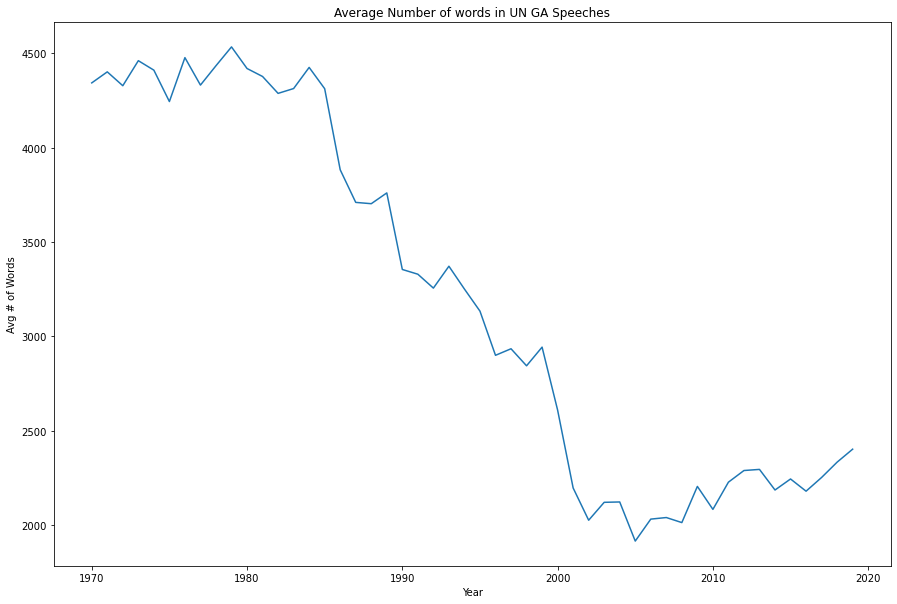

In [34]:
plt.figure(figsize=(15,10))
plt.plot(counts['Year'], counts['count_speech_words'])
plt.xlabel("Year")
plt.ylabel("Avg # of Words")
plt.title("Average Number of words in UN GA Speeches")
plt.show()

### Average Sentence counts

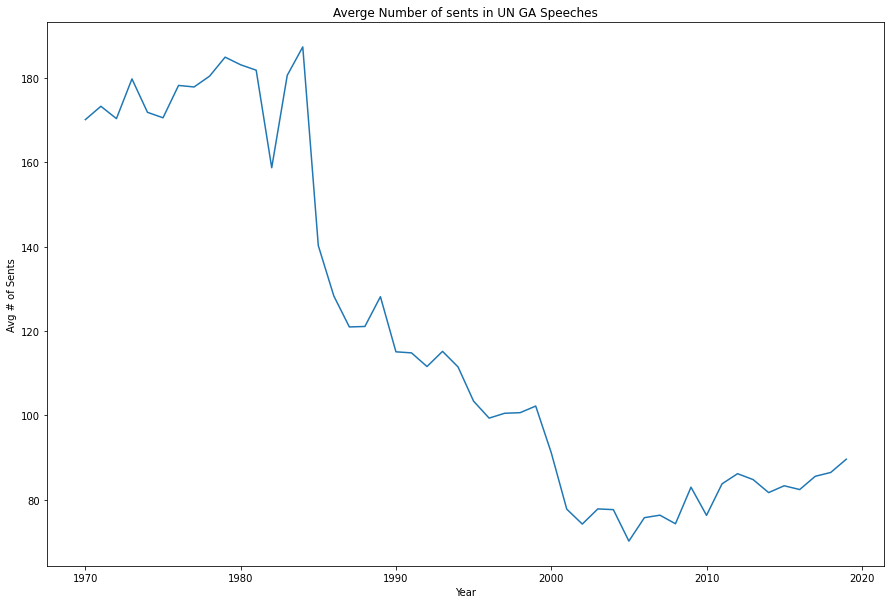

In [33]:
plt.figure(figsize=(15,10))
plt.plot(counts['Year'], counts['count_speech_sent'])
plt.xlabel("Year")
plt.ylabel("Avg # of Sents")
plt.title("Averge Number of sents in UN GA Speeches")
plt.show()

In [103]:
model = Word2Vec.load("word2vec.model")
import gensim.downloader

In [ ]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [105]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


### Sentiment for China

In [146]:
glove_vectors.most_similar('china',topn=20)

[('taiwan', 0.936076283454895),
 ('chinese', 0.8957241177558899),
 ('beijing', 0.8920878171920776),
 ('mainland', 0.8644796013832092),
 ('japan', 0.8428841233253479),
 ('vietnam', 0.8287292122840881),
 ('korea', 0.8234633803367615),
 ('hong', 0.8147337436676025),
 ('kong', 0.8008338212966919),
 ('asian', 0.7914890050888062),
 ('thailand', 0.7889024019241333),
 ('asia', 0.788318395614624),
 ('singapore', 0.7824008464813232),
 ('shanghai', 0.780830979347229),
 ('korean', 0.7633205056190491),
 ('countries', 0.7617483139038086),
 ('malaysia', 0.759504497051239),
 ('indonesia', 0.75374835729599),
 ('trade', 0.7480691075325012),
 ('india', 0.746951699256897)]

In [ ]:
!pip install spacytextblob

In [3]:
import numpy as np

In [132]:
c={"China",'chinese','beijing'}
iso="CHN"

In [133]:
df.head()

,doc,Year,Session,ISO Code,Country,Name of Person Speaking,Post,Language,Notes,sent_split,word_split,count_speech_words,count_speech_sent
0,33: May I first convey to our President the co...,1970.0,25.0,ALB,Albania,Mr. NAS,None,French,None,[33: May I first convey to our President the c...,"[33, :, May, I, first, convey, to, our, Presid...",9098,256
1,177.\t : It is a fortunate coincidence that pr...,1970.0,25.0,ARG,Argentina,Mr. DE PABLO PARDO,None,Spanish,Relates to 201: Official Records of the Disarm...,[177.\t : It is a fortunate coincidence that p...,"[177., :, It, is, a, fortunate, coincidence, t...",5190,217
2,100.\t It is a pleasure for me to extend to y...,1970.0,25.0,AUS,Australia,Mr. McMAHON,None,None,Relates to 124: Official Records of the Disarm...,"[100., It is a pleasure for me to extend to yo...","[100, ., It, is, a, pleasure, for, me, to, ext...",5695,272
3,155.\t May I begin by expressing to Ambassado...,1970.0,25.0,AUT,Austria,Mr. KIRCHSCHLAEGER,None,None,Relates to 166: Signed in Moscow on 12 August ...,"[155., May I begin by expressing to Ambassador...","[155, ., May, I, begin, by, expressing, to, Am...",4714,166
4,"176. No doubt each of us, before coming up to ...",1970.0,25.0,BEL,Belgium,Mr. HARMEL,None,French,Relates to 214: Convention of association with...,"[176., No doubt each of us, before coming up t...","[176, ., No, doubt, each, of, us, ,, before, c...",4789,207


In [134]:

df.groupby(['ISO Code']).count()

,doc,Year,Session,Country,Name of Person Speaking,Post,Language,Notes,sent_split,word_split,count_speech_words,count_speech_sent
ISO Code,,,,,,,,,,,,
AFG,49,49,49,49,49,27,10,5,49,49,49,49
AGO,42,42,42,42,42,26,35,26,42,42,42,42
ALB,50,50,50,50,50,28,33,9,50,50,50,50
AND,26,26,26,26,26,26,25,20,26,26,26,26
ARE,48,48,48,48,48,26,44,9,48,48,48,48
ARG,50,50,50,50,50,28,48,8,50,50,50,50
ARM,28,28,28,28,28,27,13,6,28,28,28,28
ATG,36,36,36,36,36,26,4,0,36,36,36,36
AUS,49,49,49,49,49,26,4,2,49,49,49,49


In [136]:
country=df[df['ISO Code']!=iso]

In [137]:
country.shape

(8433, 13)

In [138]:
import spacy


nlp = spacy.load('en_core_web_sm')
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [140]:
def sentimental(x):
    senti=[0]
    for i in x:
        for cc in c:
            if cc.lower() in i.lower():
                doc = nlp(i)
                senti.append(doc._.blob.polarity)
    
    return sum(senti)/len(senti)
            

In [141]:
country['senti_china']=country['sent_split'].apply(sentimental)

<ipython-input-141-a5e67cf1a12c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['senti_china']=country['sent_split'].apply(sentimental)


In [142]:
country.columns

Index(['doc', 'Year', 'Session', 'ISO Code', 'Country', 'Name of Person Speaking', 'Post', 'Language', 'Notes', 'sent_split', 'word_split', 'count_speech_words', 'count_speech_sent', 'senti_china'], dtype='object')

In [143]:
china=country[['Year','senti_china']].groupby('Year').mean()

In [191]:
china
china=china.rename(columns={"senti_china":"CHINA"})

### Sentiment for USA

In [147]:
glove_vectors.most_similar('usa',topn=20)

[('canada', 0.6962571740150452),
 ('atlanta', 0.6613689661026001),
 ('austin', 0.6569735407829285),
 ('america', 0.6510628461837769),
 ('united', 0.6322171688079834),
 ('rogers', 0.6314777731895447),
 ('american', 0.6242480278015137),
 ('/', 0.6196938753128052),
 ('partnered', 0.6148874163627625),
 ('australia', 0.6089106202125549),
 ('2006', 0.6088933348655701),
 ('2011', 0.6088011860847473),
 ('u.s.a.', 0.6075463891029358),
 ('2012', 0.6055748462677002),
 ('athletics', 0.6049255132675171),
 ('based', 0.6039510369300842),
 ('2010', 0.6037868857383728),
 ('phoenix', 0.603039026260376),
 ('davis', 0.6019158959388733),
 ('2007', 0.6016642451286316)]

In [148]:
c={"USA",'america','united states','united states of america'}
iso='USA'
df.head()

country=df[df['ISO Code']!=iso]

country.shape

(8432, 13)

In [149]:
country['senti_USA']=country['sent_split'].apply(sentimental)

<ipython-input-149-73177a2875ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['senti_USA']=country['sent_split'].apply(sentimental)


In [ ]:
usa=country[['Year','senti_USA']].groupby('Year').mean()

In [190]:
usa=usa.rename(columns={"senti_USA":"USA"})

### Sentiment for India


In [156]:
glove_vectors.most_similar('india',topn=20)

[('indian', 0.8648794293403625),
 ('pakistan', 0.8529723286628723),
 ('malaysia', 0.8166508078575134),
 ('bangladesh', 0.8154239058494568),
 ('delhi', 0.8142766952514648),
 ('indonesia', 0.793914258480072),
 ('thailand', 0.786440908908844),
 ('sri', 0.7809486985206604),
 ('lanka', 0.7792482972145081),
 ('africa', 0.772837221622467),
 ('china', 0.7469516396522522),
 ('south', 0.7445130348205566),
 ('nepal', 0.7375633120536804),
 ('nigeria', 0.7356868386268616),
 ('zimbabwe', 0.7319675087928772),
 ('australia', 0.729308009147644),
 ('country', 0.7241701483726501),
 ('pakistani', 0.7108411192893982),
 ('subcontinent', 0.7107338905334473),
 ('zealand', 0.7099515795707703)]

In [157]:
c={"Republic Of India","india","indian","delhi","new delhi"}

iso='IND'
df.head()

country=df[df['ISO Code']!=iso]

country.shape



(8432, 13)

In [158]:
country['senti_IND']=country['sent_split'].apply(sentimental)

ind=country[['Year','senti_IND']].groupby('Year').mean()

<ipython-input-158-73faedd92d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['senti_IND']=country['sent_split'].apply(sentimental)


In [188]:
ind=ind.rename(columns={"senti_IND":"INDIA"})

### Sentiment for Israel

In [160]:
glove_vectors.most_similar('israel',topn=20)

[('israeli', 0.8956457376480103),
 ('palestinians', 0.8649078607559204),
 ('palestinian', 0.8641211986541748),
 ('syria', 0.841474175453186),
 ('gaza', 0.8301869630813599),
 ('lebanon', 0.8250741958618164),
 ('arafat', 0.8130190372467041),
 ('israelis', 0.812950849533081),
 ('jerusalem', 0.804756760597229),
 ('yasser', 0.792197048664093),
 ('arab', 0.7893485426902771),
 ('hamas', 0.7889490723609924),
 ('iraq', 0.7836460471153259),
 ('netanyahu', 0.7680053114891052),
 ('palestine', 0.7650005221366882),
 ('plo', 0.7639289498329163),
 ('hezbollah', 0.7484215497970581),
 ('jordan', 0.7436054348945618),
 ('withdrawal', 0.7432914972305298),
 ('peace', 0.7375448346138)]

In [161]:
c={"israel","israeli","jerusalem","israelis","israelis"}

iso='ISR'
df.head()

country=df[df['ISO Code']!=iso]

country.shape



(8432, 13)

In [162]:

country['senti_ISR']=country['sent_split'].apply(sentimental)

isr=country[['Year','senti_ISR']].groupby('Year').mean()

<ipython-input-162-3affcbf14a43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['senti_ISR']=country['sent_split'].apply(sentimental)


In [192]:
isr
isr=isr.rename(columns={"senti_ISR":"ISRAEL"})

### Sentiment for Russia i.e USSR

In [168]:
glove_vectors.most_similar('ussr',topn=20)

[('soviet', 0.8112096786499023),
 ('czechoslovakia', 0.799300491809845),
 ('czechoslovak', 0.7814531922340393),
 ('leningrad', 0.7370558381080627),
 ('soviets', 0.7252940535545349),
 ('gdr', 0.7143130302429199),
 ('1949', 0.7140251994132996),
 ('sfsr', 0.705162525177002),
 ('ukrainian', 0.6905714273452759),
 ('rsfsr', 0.6888794302940369),
 ('1939', 0.6869064569473267),
 ('belarusian', 0.674769937992096),
 ('1945', 0.673001229763031),
 ('petrograd', 0.6707760095596313),
 ('austria-hungary', 0.6688565015792847),
 ('1948', 0.6651839017868042),
 ('1947', 0.6649186611175537),
 ('1956', 0.6606634259223938),
 ('1938', 0.6605771780014038),
 ('1950', 0.6603606343269348)]

In [171]:
c={'russia','russian','moscow','ussr','soviet'}

iso='RUS'
df.head()

country=df[df['ISO Code']!=iso]

country.shape


(8434, 13)

In [172]:
def sentimental(x):
    senti=[0]
    for i in x:
        for cc in c:
            if cc.lower() in i.lower():
                doc = nlp(i)
                senti.append(doc._.blob.polarity)
    
    return sum(senti)/len(senti)
            

In [173]:
country['senti_RUS']=country['sent_split'].apply(sentimental)

rus=country[['Year','senti_RUS']].groupby('Year').mean()

<ipython-input-173-32d26c19b37e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['senti_RUS']=country['sent_split'].apply(sentimental)


In [193]:
rus
rus=rus.rename(columns={"senti_RUS":"RUSSIA"})

### Sentiment for Japan

In [201]:
glove_vectors.most_similar('japan',topn=20)

[('japanese', 0.8822370767593384),
 ('china', 0.8428841233253479),
 ('korea', 0.8154973387718201),
 ('tokyo', 0.8078719973564148),
 ('taiwan', 0.7847011685371399),
 ('korean', 0.7758361101150513),
 ('asian', 0.7661136388778687),
 ('chinese', 0.7590300440788269),
 ('greece', 0.7550805807113647),
 ('beijing', 0.7429267764091492),
 ('mainland', 0.7367048263549805),
 ('singapore', 0.7287997007369995),
 ('asia', 0.7273089289665222),
 ('shanghai', 0.7268993258476257),
 ('russia', 0.723455011844635),
 ('kong', 0.7125501036643982),
 ('thailand', 0.7076813578605652),
 ('hong', 0.7044252753257751),
 ('domestic', 0.6963527798652649),
 ('indonesia', 0.6932387351989746)]

In [203]:
c={'japan','japanese','tokyo'}

iso='JPN'
df.head()

country=df[df['ISO Code']!=iso]

country.shape

(8432, 13)

In [204]:
def sentimental(x):
    senti=[0]
    for i in x:
        for cc in c:
            if cc.lower() in i.lower():
                doc = nlp(i)
                senti.append(doc._.blob.polarity)
    
    return sum(senti)/len(senti)
            

In [205]:
country['JAPAN']=country['sent_split'].apply(sentimental)

japan=country[['Year','JAPAN']].groupby('Year').mean()

<ipython-input-205-e64b5604dc93>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [206]:
japan

,JAPAN
Year,
1970.0,0.009849
1971.0,0.009503
1972.0,0.022895
1973.0,0.014222
1974.0,0.003605
1975.0,0.002842
1976.0,0.002639
1977.0,0.004083
1978.0,0.009246


### Sentiment for England

In [220]:
glove_vectors.most_similar('england',topn=20)

[('scotland', 0.9059916734695435),
 ('wales', 0.8788927793502808),
 ('ireland', 0.8387963175773621),
 ('newcastle', 0.8248962759971619),
 ('australia', 0.8085249066352844),
 ('manchester', 0.7974326014518738),
 ('indies', 0.7941839098930359),
 ('zealand', 0.7864500284194946),
 ('cricket', 0.7800652980804443),
 ('scottish', 0.766934335231781),
 ('leeds', 0.7611505389213562),
 ('liverpool', 0.7563745379447937),
 ('cardiff', 0.7558671832084656),
 ('nottingham', 0.7389919757843018),
 ('side', 0.7332348823547363),
 ('melbourne', 0.7310607433319092),
 ('rugby', 0.7309114933013916),
 ('queensland', 0.7277929186820984),
 ('sussex', 0.7259156703948975),
 ('birmingham', 0.7230117917060852)]

In [229]:
c={'england,english','london'}

iso='GBR'
df.head()

country=df[df['ISO Code']!=iso]

country.shape

(8432, 13)

In [230]:
def sentimental(x):
    senti=[0]
    for i in x:
        for cc in c:
            if cc.lower() in i.lower():
                doc = nlp(i)
                senti.append(doc._.blob.polarity)
    
    return sum(senti)/len(senti)

In [231]:
country['ENGLAND']=country['sent_split'].apply(sentimental)

england=country[['Year','ENGLAND']].groupby('Year').mean()

<ipython-input-231-75064bfbb046>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [232]:
england

,ENGLAND
Year,
1970.0,0.002116
1971.0,0.002193
1972.0,0.001787
1973.0,0.000773
1974.0,0.000688
1975.0,0.000545
1976.0,0.001414
1977.0,0.001218
1978.0,0.001502


### Sentiment for Germany

In [237]:
glove_vectors.most_similar('germany',topn=20)

[('austria', 0.8584107160568237),
 ('german', 0.8494099974632263),
 ('denmark', 0.8133766651153564),
 ('switzerland', 0.8035026788711548),
 ('berlin', 0.7985422611236572),
 ('europe', 0.7915973663330078),
 ('poland', 0.7894555330276489),
 ('france', 0.7744609117507935),
 ('netherlands', 0.7719914317131042),
 ('munich', 0.7718966603279114),
 ('belgium', 0.7649098634719849),
 ('russia', 0.7643518447875977),
 ('sweden', 0.7630673050880432),
 ('austrian', 0.7591982483863831),
 ('european', 0.7530308961868286),
 ('italy', 0.7386813163757324),
 ('britain', 0.7291993498802185),
 ('slovakia', 0.7258580327033997),
 ('germans', 0.723877489566803),
 ('hungary', 0.7203071713447571)]

In [240]:
c={'germany','german','berlin'}

iso='DEU'
df.head()

country=df[df['ISO Code']!=iso]

country.shape

(8435, 13)

In [241]:
def sentimental(x):
    senti=[0]
    for i in x:
        for cc in c:
            if cc.lower() in i.lower():
                doc = nlp(i)
                senti.append(doc._.blob.polarity)
    
    return sum(senti)/len(senti)

In [242]:
country['GERMANY']=country['sent_split'].apply(sentimental)

germany=country[['Year','GERMANY']].groupby('Year').mean()

<ipython-input-242-1ab4231ea6cb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Sentiment for Palestine

In [248]:
glove_vectors.most_similar('palestine',topn=20)

[('plo', 0.8119204640388489),
 ('arab', 0.7761361598968506),
 ('territories', 0.7678164839744568),
 ('israel', 0.7650006413459778),
 ('jerusalem', 0.7625035643577576),
 ('lebanon', 0.7441616058349609),
 ('occupation', 0.7305917739868164),
 ('zionist', 0.7290037870407104),
 ('palestinian', 0.728303849697113),
 ('peace', 0.7245680689811707),
 ('liberation', 0.7224704027175903),
 ('gaza', 0.7053173184394836),
 ('arabs', 0.7015295624732971),
 ('palestinians', 0.6975253820419312),
 ('jihad', 0.691571831703186),
 ('yasser', 0.6904839277267456),
 ('syria', 0.6875967383384705),
 ('jewish', 0.6862033605575562),
 ('lebanese', 0.6762046813964844),
 ('liberate', 0.6729438900947571)]

In [249]:
c={'palestine','palestinian'}

iso='PSE'
df.head()

country=df[df['ISO Code']!=iso]

country.shape

(8460, 13)

In [250]:
def sentimental(x):
    senti=[0]
    for i in x:
        for cc in c:
            if cc.lower() in i.lower():
                doc = nlp(i)
                senti.append(doc._.blob.polarity)
    
    return sum(senti)/len(senti)

In [251]:
country['PALESTINE']=country['sent_split'].apply(sentimental)

palestine=country[['Year','PALESTINE']].groupby('Year').mean()

<ipython-input-251-d42f21cdbd1a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Concating all the countrie

In [252]:
viz=pd.concat([rus,isr,china,usa,ind,japan,england,germany,palestine],axis=1).reset_index()

In [253]:
viznew=pd.melt(viz, id_vars=['Year'],var_name='Country')

In [254]:
viznew

,Year,Country,value
0,1970.0,RUSSIA,0.050098
1,1971.0,RUSSIA,0.042667
2,1972.0,RUSSIA,0.054156
3,1973.0,RUSSIA,0.033561
4,1974.0,RUSSIA,0.024094
5,1975.0,RUSSIA,0.029817
6,1976.0,RUSSIA,0.019562
7,1977.0,RUSSIA,0.020876
8,1978.0,RUSSIA,0.022549
9,1979.0,RUSSIA,0.033459


In [257]:
import plotly.express as px

fig = px.line(viznew, x="Year", y="value", color='Country',range_y=[-0.05,0.2],width=1000,height=700)
fig.show()

In [258]:
fig.write_html("sentiments_major_nations.html")